In [1]:
using Plots

# Tarea 4

* Pensar en una generalizacion de la esfera de Bloch para un qutrit (sistema de 3 niveles) y para un sistema de dos qubits. Programar una rutina que efectue dicho calculo

## Qutrit

Para el caso de un qutrit, un sistema de 3 niveles, el sistema se puede representar como 
$$|\psi\rangle = \alpha |0\rangle + \beta |1\rangle + \gamma |2\rangle$$

Donde se pide que $\| |\psi\rangle\|^2=1$

Para este caso, las matrices 

## Matrices Gell-Mann
$$
\sigma_1=
\begin{pmatrix}
  0 & 1 & 0 \\
  1 & 0 & 0 \\
  0 & 0 & 0
 \end{pmatrix},\quad
\sigma_2=
\begin{pmatrix}
  0 & -i & 0 \\
  i &  0 & 0 \\
  0 & 0 & 0
\end{pmatrix},\quad
\sigma_3=
\begin{pmatrix}
  1 &  0 & 0 \\
  0 & -1 & 0 \\
  0 & 0 & 0
\end{pmatrix} ,\quad
\sigma_4=
\begin{pmatrix}
  0 &  0 & 1 \\
  0 &  0 & 0 \\
  1 & 0 & 0
\end{pmatrix},\quad
\sigma_5=
\begin{pmatrix}
  0 &  0 & -i \\
  0 &  0 & 0 \\
  i & 0 & 0
\end{pmatrix},\quad
\sigma_6=
\begin{pmatrix}
  0 &  0 & 0 \\
  0 &  0 & 1 \\
  0 & 1 & 0
\end{pmatrix},\quad
\\
\sigma_7=
\begin{pmatrix}
  0 &  0 & 0 \\
  0 &  0 & i \\
  0 & -i & 0
\end{pmatrix},\quad
\sigma_8=
\frac{1}{\sqrt{3}}
\begin{pmatrix}
  1 &  0 & 0 \\
  0 &  1 & 0 \\
  0 & 0 & -2
\end{pmatrix}.
$$

https://arxiv.org/pdf/1111.4427v2.pdf

In [2]:
sigma_1=[0. 1. 0.; 1. 0. 0.; 0. 0. 0];
sigma_2=[0. -im 0.; im 0. 0.; 0. 0. 0];
sigma_3=[1. 0. 0.; 0. -1. 0.; 0. 0. 0];
sigma_4=[0. 0. 1.; 0. 0. 0.; 1. 0. 0];
sigma_5=[0. 0. -im; 0. 0. 0.; im 0. 0];
sigma_6=[0. 0. 0.; 0. 0. 1.; 0. 1. 0];
sigma_7=[0. 0. 0.; 0. 0. im; 0. -im 0];
sigma_8=1/sqrt(3)*[1. 0. 0.; 0. 1. 0.; 0. 0. -2];
sigmasGellMann=Array[sigma_1, sigma_2, sigma_3, sigma_4, sigma_5, sigma_6, sigma_7, sigma_8];

In [3]:
# se prueba si las matrices son hermitianas, de traza 0 y de norma
prueba = true
for iter in eachindex(sigmasGellMann)
    sigma=sigmasGellMann[iter]
    if abs(trace(sigma))<1e-5 && ishermitian(sigma)#se prueba la traza es cero y es una matriz hermiticidad
        prueba = prueba && true
    else
        prueba = prueba && false
    end
end
print(prueba)

true

# 2 qubits

Para el caso de 2 qubits, el espacio de Hilbert en donde vive es sistema es el producto tensorial de los espacios de cada qubit, por tanto es natural definir las siguientes matrices:

$$\sigma_{\alpha \beta} = \sigma_{\alpha} \otimes \sigma_{\beta}$$

Donde $\sigma_{\alpha} \in \{\sigma_{x}, \sigma_{y}, \sigma_{z}, \mathbb{1}\}$

In [4]:
sigma_x=[0. 1.; 1. 0.];
sigma_y=[0. -im; im 0];
sigma_z=[1. 0.;0. -1.];
sigmas=Array[eye(2),sigma_x, sigma_y, sigma_z];

In [5]:
# se crea una funcoin que saque el producto tensorial para matrices de 2x2 ya que no la encontre
function tensor(s,p)
    [s[1]*p s[2]*p; s[3]*p s[4]*p]
end

tensor (generic function with 1 method)

In [6]:
# Se crean las matrices
sigmas_2q = []
for i in 1:4
    for j in 1:4
        push!(sigmas_2q,tensor(sigmas[i], sigmas[j]))
    end
end

# se prueba si las matrices son hermitianas, de traza 0 (salvo la identidad) y de norma
prueba = true
for iter in eachindex(sigmas_2q)
    if iter !=1
        sigma=sigmas_2q[iter]
        if abs(trace(sigma))<1e-5 && ishermitian(sigma)#se prueba la traza es cero y es una matriz hermiticidad
            prueba = prueba && true
        else
            prueba = prueba && false
        end
    end
end
print(prueba)

true

Notemos que solamente la matriz identidad en el nuevo espacio no tiene traza cero, sin embargo sabemos que solamente hay 15 matrices independientes de las 16 generadas.

## Matrices aleatorias y valores esperados


* Compare el calculo de la traza de un operador hermitico aleatorio exacto con el valor esperado con respecto a un solo estado aleatorio:
  * Construya un operador aleatorio hermítico, partiendo de un arreglo de $n\times n$ de números aleatorios complejos (sea esa matriz $A$). El observable a usar será $H=A+A^\dagger$ (muestre numérica que efectivamente es hermítico.
  * Use un estado aleatorio de la dimension correspondiente para calcular el valor esperado.
  * Compare con el valor de $\text{tr} H$. Debe ser muy cercano, cuando lo dividimos por la dimension del sistema. 
  * Calcule la diferencia como función de la dimensión del sistema y grafiquelo. 
  * Repita el ejercicio para una familia de operadores que varien con la dimensión pero que sean acotados (el espectro debe permanecer acotado a medida que la dimensión aumenta).


In [7]:
# Retomando varias funciones del notebook 04
# Calcula el proyector
function projector(state)
    return state*state'
end

function random_state(dim=2)
    v=randn(1,dim)+randn(1,dim)im
    v=v/norm(v)
    return v'
end

function randHermitian(n)
    a = rand(n,n)+1im*rand(n,n)
    b = a+conj(transpose(a))
    return b
end

randHermitian (generic function with 1 method)

Sabemos que el valor esperado de una matriz hermitiana $H$ a partir de un estado aleatorio $|\psi\rangle$ se puede calcular como
$$\langle \psi| H |\psi \rangle = tr|\psi \rangle \langle \psi| H$$

Como queremos ver que el valor esperado de $H$, a partir de un estado aleatorio, se aproxima al valor de $\frac{1}{n}trH$, donde $n$ es la dimension de $|\psi\rangle$, se toma el cociente entre ambos valores.

In [8]:
#maximo numero de dimension
N = 500
#arreglo donde se guardan los cocientes
tipo = zeros(N)
for l in 1:N
    # se crea una matriz hermitiana aleatoria
    H = randHermitian(l);
    # se crea un estado aleatorio
    psi = random_state(l)
    # se calcula el cociente
    tipo[l] = real(trace(projector(psi)*H)/(trace(H)/l))
end

[Plots.jl] Initializing backend: pyplot



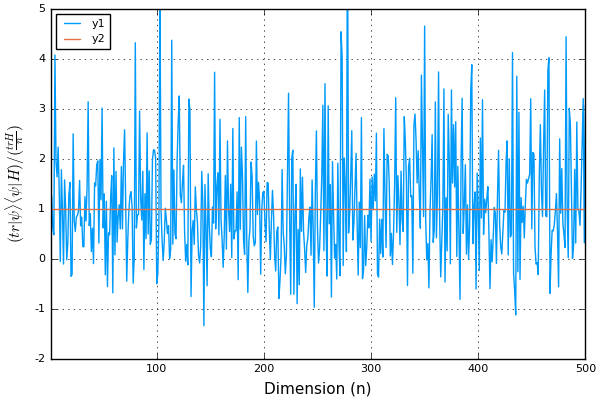

In [9]:
plot(tipo, xlabel = "Dimension (n)", ylabel = "\$(tr \|\\psi \\rangle \\langle \\psi\| H)/(\\frac{trH}{n})\$", ylim=(-2,5))
plot!(ones(N))

Notemos que apesar que no disminuye la amplitud, para todas las dimensiones el cociente oscila alrededor de 1.